## Lab 1 - Data Understanding with EDA

Use any dataset of your choice
Demonstrate methods for visualization as well as computation
Demonstrate methods for numeric as well as nominal data
Apply minimum one graph from seaborn library

## Author : Nijatullah Mansoor
## Ro No: 2047119

### Objective 

we wil do EDA analyse the world covid-19 data and see which region is the most affected and wich region is less effected in the world we will also see the relation between the number of cases and deaths. 

### Let's Import Libraries

`Step1:` Let's' import the libraries.

In [1]:
import pandas as pd  # for data manipulation and analysis
import numpy as np   # for scientific computing
import statistics    # 
import seaborn as sns      # visualization library for statistical graphics plotting 
import matplotlib.pyplot as plt   # import matplotlib.pyplot as plt 

`Step2`: Let's read the dataset and see how it organized.

In [2]:
covid_df = pd.read_csv("WHO COVID-19 global table data July 28th 2021 at 6.19.06 PM.csv")

Let's first check the columns names.

In [3]:
covid_df.columns

Index(['Name', 'WHO Region', 'Cases - cumulative total',
       'Cases - cumulative total per 100000 population',
       'Cases - newly reported in last 7 days',
       'Cases - newly reported in last 7 days per 100000 population',
       'Cases - newly reported in last 24 hours', 'Deaths - cumulative total',
       'Deaths - cumulative total per 100000 population',
       'Deaths - newly reported in last 7 days',
       'Deaths - newly reported in last 7 days per 100000 population',
       'Deaths - newly reported in last 24 hours'],
      dtype='object')

We can see that the column names is very long, let's rename with short names. 

In [4]:
original_columns_name = covid_df.columns

You can alwasy refe to the original name for claryfication.

In [5]:
covid_df.rename(columns={'Name': 'name', 'WHO Region': 'region','Cases - cumulative total':'total_cases',
                          'Cases - cumulative total per 100000 population':'total_cases_per_100000p',
                          'Cases - newly reported in last 7 days':'new_last_7_day_cases',
                          'Cases - newly reported in last 7 days per 100000 population':'new_last_7_day_per_100000p',
                          'Cases - newly reported in last 24 hours':'new_cases_last_24h',
                          'Deaths - cumulative total':'total_deaths',
                          'Deaths - cumulative total per 100000 population':'total_deaths_per_100000p',
                           'Deaths - newly reported in last 7 days':'new_deaths_last_7_days',
                           'Deaths - newly reported in last 7 days per 100000 population':'new_deaths_last_7_day_per_100000p',
                           'Deaths - newly reported in last 24 hours':'new_deaths_last_24h'}, inplace=True)

Now let's check the columns names.

In [6]:
covid_df.columns

Index(['name', 'region', 'total_cases', 'total_cases_per_100000p',
       'new_last_7_day_cases', 'new_last_7_day_per_100000p',
       'new_cases_last_24h', 'total_deaths', 'total_deaths_per_100000p',
       'new_deaths_last_7_days', 'new_deaths_last_7_day_per_100000p',
       'new_deaths_last_24h'],
      dtype='object')

Let's check the head of the dataFrame.

In [7]:
covid_df.head()

,name,region,total_cases,total_cases_per_100000p,new_last_7_day_cases,new_last_7_day_per_100000p,new_cases_last_24h,total_deaths,total_deaths_per_100000p,new_deaths_last_7_days,new_deaths_last_7_day_per_100000p,new_deaths_last_24h
0,Global,World,194608040,2496.722463,3821392,49.026521,410645,4170155,53.500974,70540,0.904992,7628
1,United States of America,Americas,34256255,10349.240000,462055,139.590000,11680,605780,183.010000,1739,0.530000,45
2,India,South-East Asia,31440951,2278.320000,266629,19.320000,29689,421382,30.530000,6900,0.500000,415
3,Brazil,Americas,19688663,9262.660000,312089,146.820000,18129,549924,258.720000,7710,3.630000,476
4,Russian Federation,Europe,6172812,4229.850000,166276,113.940000,23032,155380,106.470000,5458,3.740000,779


Le'ts check the genral information about our datasets.

In [8]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               238 non-null    object 
 1   region                             238 non-null    object 
 2   total_cases                        238 non-null    int64  
 3   total_cases_per_100000p            237 non-null    float64
 4   new_last_7_day_cases               238 non-null    int64  
 5   new_last_7_day_per_100000p         237 non-null    float64
 6   new_cases_last_24h                 238 non-null    int64  
 7   total_deaths                       238 non-null    int64  
 8   total_deaths_per_100000p           237 non-null    float64
 9   new_deaths_last_7_days             238 non-null    int64  
 10  new_deaths_last_7_day_per_100000p  237 non-null    float64
 11  new_deaths_last_24h                238 non-null    int64  

Let's check for the null values.

In [9]:
covid_df.isnull().sum()

name                                 0
region                               0
total_cases                          0
total_cases_per_100000p              1
new_last_7_day_cases                 0
new_last_7_day_per_100000p           1
new_cases_last_24h                   0
total_deaths                         0
total_deaths_per_100000p             1
new_deaths_last_7_days               0
new_deaths_last_7_day_per_100000p    1
new_deaths_last_24h                  0
dtype: int64

We have only one null record let's drop this record. 

In [10]:
covid_df.dropna(inplace=True)

In [11]:
covid_df.isnull().sum()

name                                 0
region                               0
total_cases                          0
total_cases_per_100000p              0
new_last_7_day_cases                 0
new_last_7_day_per_100000p           0
new_cases_last_24h                   0
total_deaths                         0
total_deaths_per_100000p             0
new_deaths_last_7_days               0
new_deaths_last_7_day_per_100000p    0
new_deaths_last_24h                  0
dtype: int64

Let's check the head of the dataFrame.

In [12]:
covid_df.head()

,name,region,total_cases,total_cases_per_100000p,new_last_7_day_cases,new_last_7_day_per_100000p,new_cases_last_24h,total_deaths,total_deaths_per_100000p,new_deaths_last_7_days,new_deaths_last_7_day_per_100000p,new_deaths_last_24h
0,Global,World,194608040,2496.722463,3821392,49.026521,410645,4170155,53.500974,70540,0.904992,7628
1,United States of America,Americas,34256255,10349.240000,462055,139.590000,11680,605780,183.010000,1739,0.530000,45
2,India,South-East Asia,31440951,2278.320000,266629,19.320000,29689,421382,30.530000,6900,0.500000,415
3,Brazil,Americas,19688663,9262.660000,312089,146.820000,18129,549924,258.720000,7710,3.630000,476
4,Russian Federation,Europe,6172812,4229.850000,166276,113.940000,23032,155380,106.470000,5458,3.740000,779


Let's get some common statistics about the dataset.

In [13]:
covid_df.describe()

,total_cases,total_cases_per_100000p,new_last_7_day_cases,new_last_7_day_per_100000p,new_cases_last_24h,total_deaths,total_deaths_per_100000p,new_deaths_last_7_days,new_deaths_last_7_day_per_100000p,new_deaths_last_24h
count,2.370000e+02,237.000000,2.370000e+02,237.000000,237.000000,2.370000e+02,237.000000,237.000000,237.000000,237.000000
mean,1.642259e+06,3793.507985,3.224803e+04,88.865892,3465.358650,3.519113e+04,62.419920,595.274262,1.058418,64.371308
std,1.303647e+07,4145.312287,2.526766e+05,211.301464,27081.788516,2.776488e+05,81.886423,4722.788629,3.947925,517.348239
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,4.985000e+03,277.580000,3.900000e+01,2.610000,0.000000,4.800000e+01,2.930000,0.000000,0.000000,0.000000
50%,5.208900e+04,2278.320000,6.910000e+02,24.900000,27.000000,8.230000e+02,26.040000,4.000000,0.080000,0.000000
75%,3.804310e+05,6661.700000,6.269000e+03,91.850000,723.000000,6.461000e+03,95.640000,69.000000,0.710000,7.000000
max,1.946080e+08,18866.240000,3.821392e+06,2018.060000,410645.000000,4.170155e+06,594.110000,70540.000000,50.100000,7628.000000


### Descriptive analyses

Let's caculate the 5-Number Summary for some columns of our dataset.

first we will caculate for the total cases.

In [14]:
# calculate quartiles
quartiles = np.percentile(covid_df['total_cases'], [25, 50, 75])
# calculate min/max
data_min, data_max = covid_df['total_cases'].min(), covid_df['total_cases'].max()
# let's print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.000
Q1: 4985.000
Median: 52089.000
Q3: 380431.000
Max: 194608040.000


Now will calculate for the total_deaths.

In [15]:
# calculate quartiles
quartiles = np.percentile(covid_df['total_deaths'], [25, 50, 75])
# calculate min/max
data_min, data_max = covid_df['total_deaths'].min(), covid_df['total_deaths'].max()
# let's print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 0.000
Q1: 48.000
Median: 823.000
Q3: 6461.000
Max: 4170155.000


Now let's analysis the data based on the region we will find out which region has the most number of deaths and covid cases.

In [16]:
covid_df['region'].unique()

array(['World', 'Americas', 'South-East Asia', 'Europe',
       'Eastern Mediterranean', 'Africa', 'Western Pacific'], dtype=object)

we won't consider the world because it represent the whole world.

In [17]:
region_covid_df = covid_df.groupby(['region']).agg({'total_cases': ['sum']})
region_covid_df

,total_cases
,sum
region,
Africa,4813735
Americas,76182529
Eastern Mediterranean,12255849
Europe,59312787
South-East Asia,37755175
Western Pacific,4287201
World,194608040


Let's drop the World from the data because we don't require it.

In [18]:
region_covid_df.drop(["World"],inplace=True)

In [19]:
region_covid_df

,total_cases
,sum
region,
Africa,4813735
Americas,76182529
Eastern Mediterranean,12255849
Europe,59312787
South-East Asia,37755175
Western Pacific,4287201


In [20]:
df = region_covid_df['total_cases']

Let's plot a bar graph.

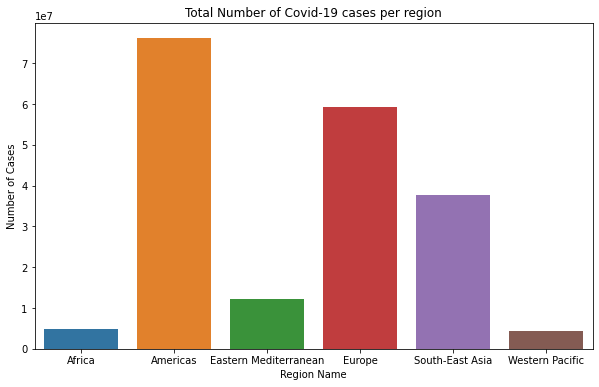

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.index,y='sum',data=df)
plt.title("Total Number of Covid-19 cases per region")
plt.ylabel("Number of Cases")
plt.xlabel("Region Name")
plt.show()

Let's plot a pie chart

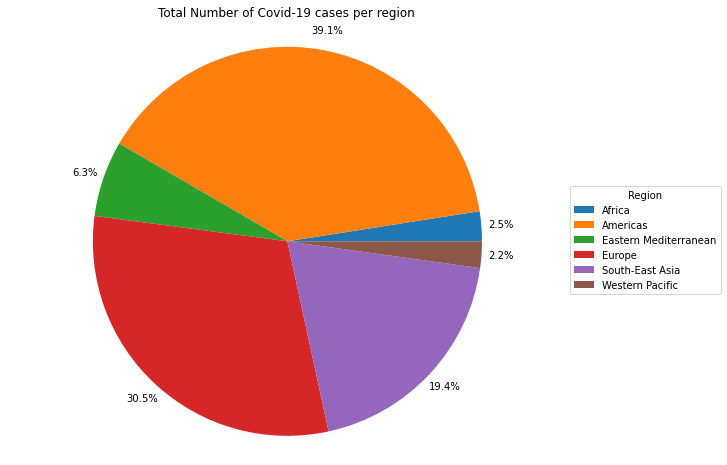

In [22]:
plt.figure(figsize=(10,8))
y = df['sum']
mylabels = df.index
plt.pie(y,autopct='%1.1f%%',pctdistance=1.1, labeldistance=1.2)
plt.title("Total Number of Covid-19 cases per region")
plt.legend(mylabels,title="Region",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show() 

From the pie and bar graph we can see that the most effected Region is Americas and the lest effeted region is Western Pacific

Let's do the same for the total death see where the most death occure.

In [23]:
region_covid_df = covid_df.groupby(['region']).agg({'total_deaths': ['sum']})
region_covid_df

,total_deaths
,sum
region,
Africa,113646
Americas,1993599
Eastern Mediterranean,232235
Europe,1213879
South-East Asia,554200
Western Pacific,62583
World,4170155


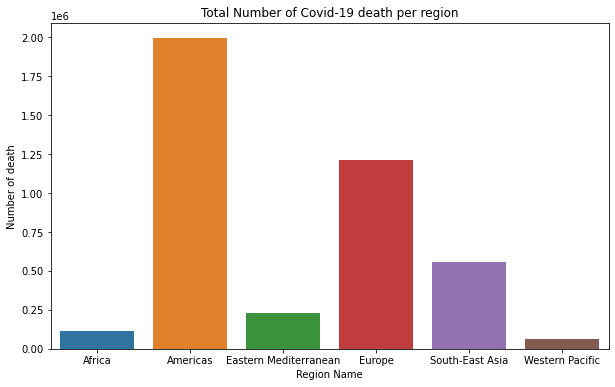

In [24]:
region_covid_df.drop(["World"],inplace=True)
df = region_covid_df['total_deaths']

plt.figure(figsize=(10,6))
sns.barplot(x=df.index,y='sum',data=df)
plt.title("Total Number of Covid-19 death per region")
plt.ylabel("Number of death")
plt.xlabel("Region Name")
plt.show()

We can see the most number of cases was in Americas and the most number of deaths is also in America which make sense. But we can see that the number of cases in africa was less comparatively to Westren Pascific but the number of death is more in Africa than Westren Pacific which make sense because they countries for example American Samoa (USA),Australia,Brunei Darussalam,Cambodia and  China. These countries may have better healthcare system compare to Africa.

### Let's visualize the Deaths - cumulative total per 100000 population.

First let's get the data.

In [25]:
region_covid_df = covid_df.groupby(['region']).agg({'total_deaths_per_100000p': ['sum']})
region_covid_df

,total_deaths_per_100000p
,sum
region,
Africa,807.620000
Americas,4626.500000
Eastern Mediterranean,1033.960000
Europe,7751.140000
South-East Asia,190.150000
Western Pacific,330.650000
World,53.500974


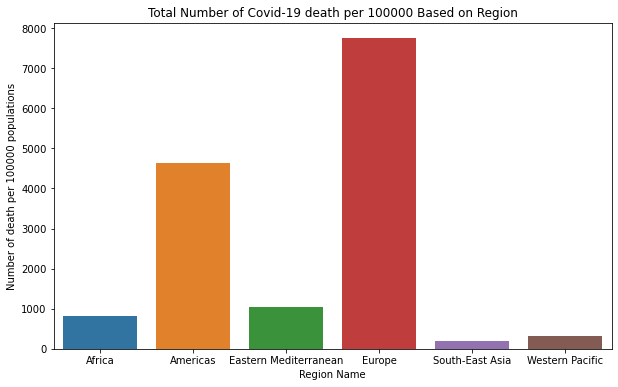

In [26]:
region_covid_df.drop(["World"],inplace=True)
df = region_covid_df['total_deaths_per_100000p']

plt.figure(figsize=(10,6))
sns.barplot(x=df.index,y='sum',data=df)
plt.title("Total Number of Covid-19 death per 100000 Based on Region")
plt.ylabel("Number of death per 100000 populations")
plt.xlabel("Region Name")
plt.show()

We can see that the Deaths - cumulative total per 100000 population the most effected area is Europe. However the most number of deaths was in us, the reason is that because the population of whole Europe is less than America. 

### Now let's find the average number of death per region. 

In [27]:
region_covid_df = covid_df.groupby(['region']).agg({'total_cases': ['mean']})
region_covid_df

,total_cases
,mean
region,
Africa,9.627470e+04
Americas,1.360402e+06
Eastern Mediterranean,5.570840e+05
Europe,9.566579e+05
South-East Asia,3.432289e+06
Western Pacific,1.224915e+05
World,1.946080e+08


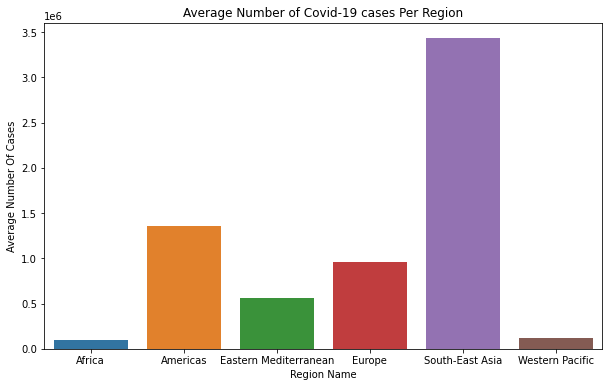

In [28]:
region_covid_df.drop(["World"],inplace=True)
df = region_covid_df['total_cases']

plt.figure(figsize=(10,6))
sns.barplot(x=df.index,y='mean',data=df)
plt.title("Average Number of Covid-19 cases Per Region")
plt.ylabel("Average Number Of Cases")
plt.xlabel("Region Name")
plt.show()

Let's see the relationship betweent the new_casses in last 24 and the deaths in last 24 hours.

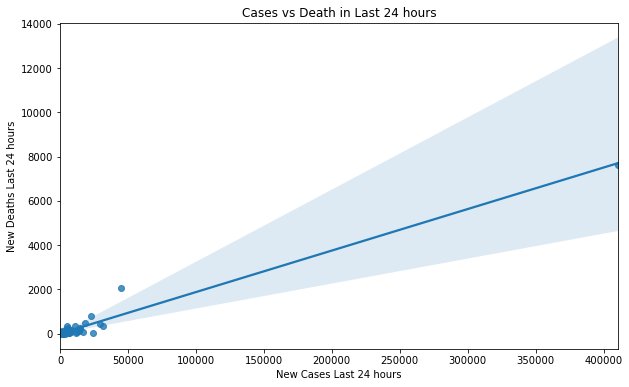

In [29]:
plt.figure(figsize=(10,6))
sns.regplot(x = covid_df['new_cases_last_24h'],y = covid_df['new_deaths_last_24h'])
plt.xlabel('New Cases Last 24 hours')
plt.ylabel('New Deaths Last 24 hours')
plt.title('Cases vs Death in Last 24 hours')
plt.show()

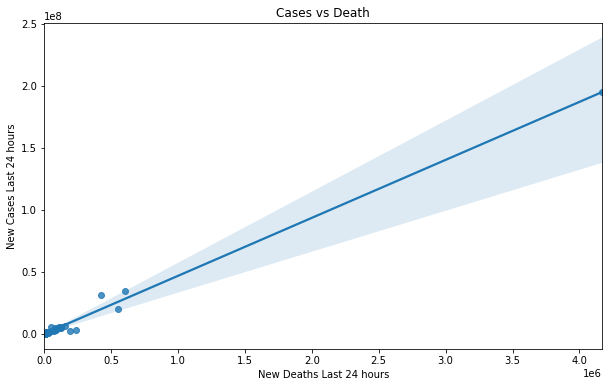

In [30]:
plt.figure(figsize=(10,6))
sns.regplot(y = covid_df['total_cases'],x = covid_df['total_deaths'])
plt.ylabel('New Cases Last 24 hours')
plt.xlabel('New Deaths Last 24 hours')
plt.title('Cases vs Death')
plt.show()

From the above visualiztion we cas see that the death has a direct relation with the cases as the number of cases increase the death aslo increase.

<AxesSubplot:xlabel='total_cases'>

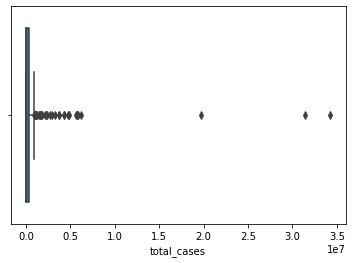

In [31]:
df = covid_df.drop(0)
sns.boxplot(x=df['total_cases'])

<AxesSubplot:xlabel='total_deaths'>

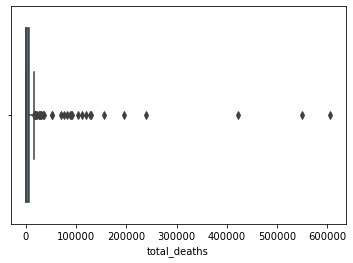

In [32]:
sns.boxplot(x=df['total_deaths'])

Let's plot the normal distribution of deaths. 

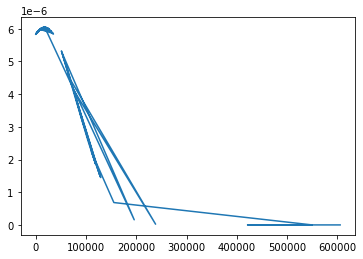

In [33]:
from scipy.stats import norm
import statistics
mean = statistics.mean(df['total_deaths'])
sd = statistics.stdev(df['total_deaths'])
plt.plot(df['total_deaths'], norm.pdf(df['total_deaths'], mean, sd))
plt.show()

In [34]:
sd

65965.78357209619

Hence the  data is very variant we won't get proper plot for this we need data which is not to much variant.